In [9]:
from scipy import fftpack
import numpy.fft as fp
from skimage.color import rgb2gray
from scipy import ndimage, misc 
import numpy as np
from skimage.io import imread, imshow, show
from scipy import misc
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()


Saving 4.jpg to 4.jpg


In [3]:
from PIL import Image
i1= np.array(Image.open("1.jpg").convert('L'))

(<matplotlib.image.AxesImage at 0x7f0816533a50>,
 (-0.5, 258.5, 194.5, -0.5),
 Text(0.5, 1.0, 'Original image'))

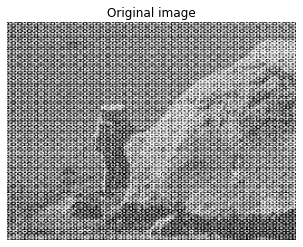

In [4]:
pylab.imshow(i1,cmap='gray'), pylab.axis('off'), pylab.title('Original image')

Text(0.5, 1.0, 'Spectrum with Fourier transform')

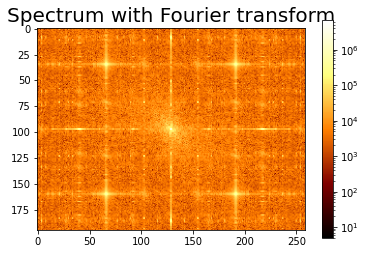

In [5]:
from scipy import fftpack
from matplotlib.colors import LogNorm
im_fft = fftpack.fft2(i1)
def plot_spectrum(im_fft):
  pylab.imshow(np.abs(im_fft), norm=LogNorm(vmin=5), cmap=pylab.cm.afmhot),pylab.colorbar()
plot_spectrum(fftpack.fftshift(im_fft))
pylab.title('Spectrum with Fourier transform', size=20)

Text(0.5, 1.0, 'Filtered Spectrum')

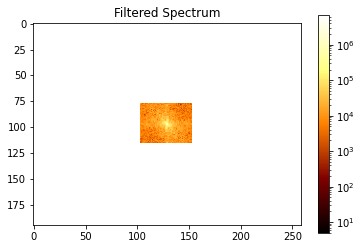

In [6]:
keep_fraction = 0.1
im_fft2 = im_fft.copy()
r, c = im_fft2.shape
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
plot_spectrum(fftpack.fftshift(im_fft2)),
pylab.title('Filtered Spectrum')

Text(0.5, 1.0, 'Reconstructed Image')

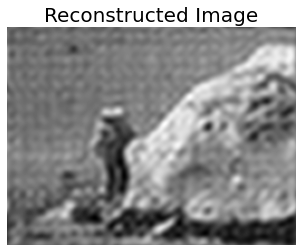

In [7]:
im_new = fp.ifft2(im_fft2).real
pylab.imshow(im_new, pylab.cm.gray),
pylab.axis('off')
pylab.title('Reconstructed Image', size=20)

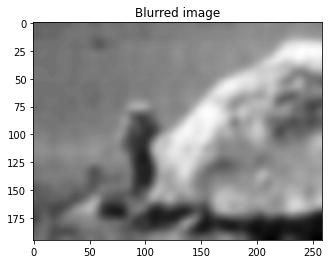

In [10]:
im_blur = ndimage.gaussian_filter(i1,4)

plt.figure()
plt.imshow(im_blur, plt.cm.gray)
plt.title('Blurred image')

plt.show()

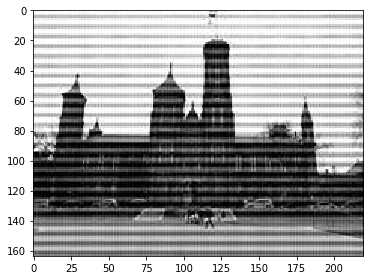

In [11]:
i2 = np.array(Image.open("2.jpg").convert('L'))
imshow(i2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


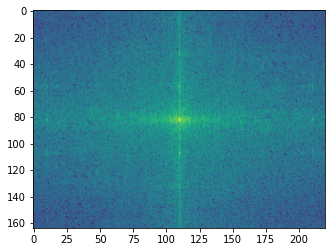

(<matplotlib.image.AxesImage at 0x7f0811a94950>, None)

In [12]:
i2=np.array(i2)
freq2=fp.fft2(i2)
freq2shifted=fp.fftshift(freq2)
pylab.imshow( (20*np.log10( 0.1 + freq2shifted)).astype(int)), pylab.show()

In [13]:
freq2=freq2shifted.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


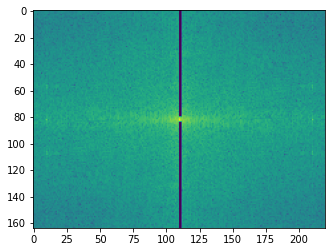

(<matplotlib.image.AxesImage at 0x7f0811a21050>, None)

In [14]:
freq2[:80,110:112]=freq2[84:,110:112]=0
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int)), pylab.show()

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


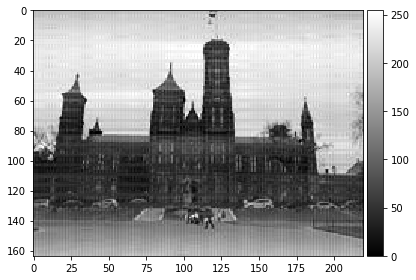

In [15]:
i2f = np.clip(fp.ifft2(fftpack.ifftshift(freq2)).real,0,255) 
imshow(i2f,cmap='gray')

(<matplotlib.image.AxesImage at 0x7f0811872390>, (-0.5, 299.5, 293.5, -0.5))

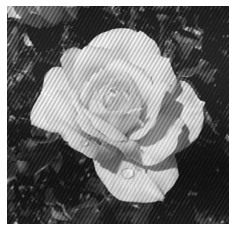

In [16]:
i3 = np.array(Image.open("3.jpg").convert('L'))
pylab.imshow(i3,cmap='gray'),pylab.axis("off")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


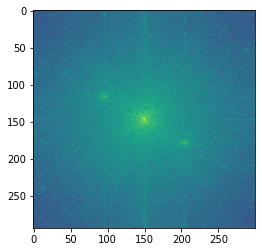

(<matplotlib.image.AxesImage at 0x7f0811845cd0>, None)

In [17]:
freq2=fp.fft2(i3)
freq3shifted=fp.fftshift(freq2)
pylab.imshow( (20*np.log10( 0.1 + freq3shifted)).astype(int)), pylab.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


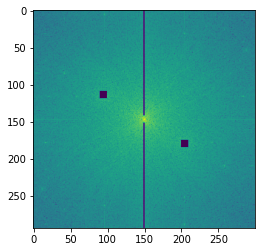

(<matplotlib.image.AxesImage at 0x7f08117b1e10>, None)

In [18]:
freq3=freq3shifted.copy()
freq3[:142,149:151]=freq3[152:,149:151]=0
freq3[175:185,200:210]=0
freq3[109:119,90:100]=0
pylab.imshow( (20*np.log10( 0.1 + freq3)).astype(int)), pylab.show()

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


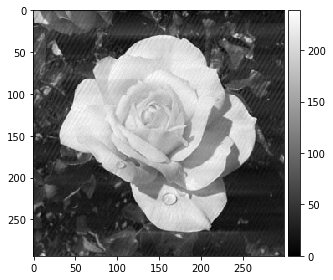

In [19]:
i3f = np.clip(fp.ifft2(fftpack.ifftshift(freq3)).real,0,255) 
imshow(i3f,cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


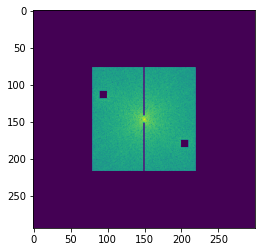

(<matplotlib.image.AxesImage at 0x7f0811a5e350>, None)

In [20]:
freqtest=freq3.copy()
freq3_low=freq3.copy()
w,h =freqtest.shape
half_w,half_h=int(w/2),int(h/2)
freq3_low[half_w-70:half_w+70,half_h-70:half_h+70] = 0
freqtest -= freq3_low
pylab.imshow( (20*np.log10( 0.1 + freqtest)).astype(int)), pylab.show()

(<matplotlib.image.AxesImage at 0x7f08116bd190>, (-0.5, 299.5, 293.5, -0.5))

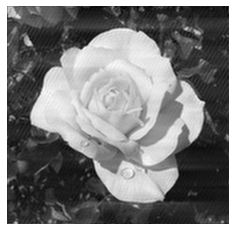

In [21]:
i3f = np.clip(fp.ifft2(fftpack.ifftshift(freqtest)).real,0,255)
pylab.imshow(i3f,cmap='gray'),pylab.axis("off")

(<matplotlib.image.AxesImage at 0x7f0811391250>, (-0.5, 299.5, 293.5, -0.5))

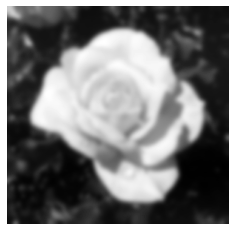

In [30]:
im_blurred = ndimage.gaussian_filter(i3,3)
pylab.imshow(im_blurred,cmap='gray'),pylab.axis("off")

(<matplotlib.image.AxesImage at 0x7f0814587210>, (-0.5, 715.5, 536.5, -0.5))

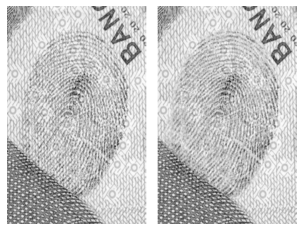

In [23]:

i4= np.mean(imread("4.jpg"), axis=2)
pylab.imshow(i4,cmap='gray'),pylab.axis("off")

(<matplotlib.image.AxesImage at 0x7f08115f1a10>, (-0.5, 715.5, 536.5, -0.5))

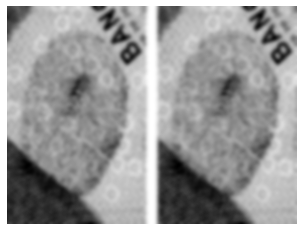

In [24]:
im4_blurred = ndimage.gaussian_filter(i4,5)
pylab.imshow(im4_blurred,cmap='gray'),pylab.axis("off")


(<matplotlib.image.AxesImage at 0x7f08115d5910>, (-0.5, 715.5, 536.5, -0.5))

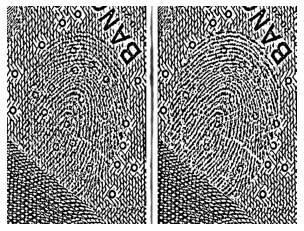

In [25]:
im4_detail = np.clip(i4 - im4_blurred, 0, 1)
pylab.imshow(im4_detail,cmap='gray'),pylab.axis("off")


(<matplotlib.image.AxesImage at 0x7f0811539790>, (-0.5, 715.5, 536.5, -0.5))

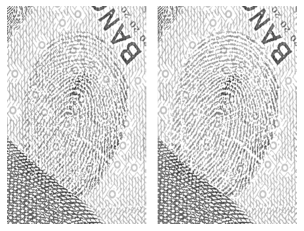

In [26]:
im4_sharp = np.clip(i4 + 100*im4_detail, 0, 255)
pylab.imshow(im4_sharp,cmap='gray'),pylab.axis("off")


(<matplotlib.image.AxesImage at 0x7f081151e350>, (-0.5, 715.5, 536.5, -0.5))

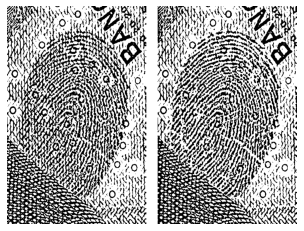

In [27]:
binary_im4=im4_sharp>200
pylab.imshow(binary_im4,cmap='gray'),pylab.axis("off")
